In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10, (2 * (i//2) * np.pi*4/d_model) / np.float32(d_model))
    return pos * angle_rates 

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return pos_encoding

(1, 16, 16)


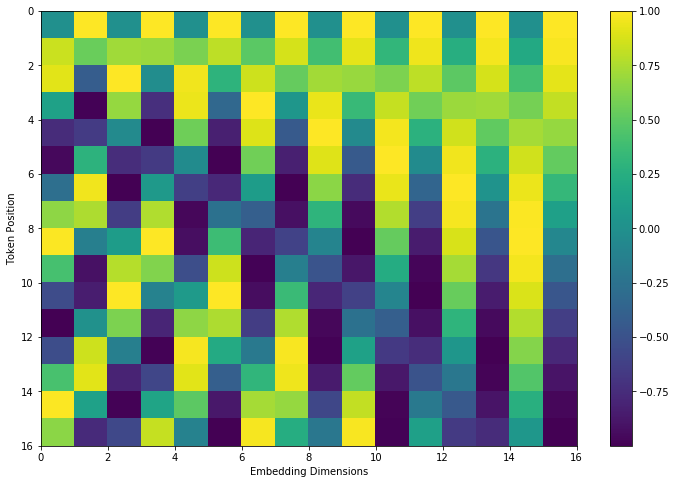

In [3]:
dim = 16

pe = positional_encoding(dim,dim)
print (pe.shape)


plt.figure(figsize=(12,8))
plt.pcolormesh(pe[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dim))
plt.ylim((dim,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()



In [4]:
for i in range(16):
    print(np.dot(pe[0,:,i],pe[0,:,i]))

7.870039090063012
8.129960909936989
7.887582375295612
8.112417624704388
7.427013785456012
8.572986214543988
7.7633580737436025
8.236641926256397
7.76004360891193
8.239956391088072
8.185955130634458
7.814044869365543
6.777198833733193
9.222801166266809
7.643784306174997
8.356215693825003


In [5]:
for i in range(16):
    for j in range(16):
        if i != j:
            print(np.dot(pe[0,:,i],pe[0,:,j]))

-0.11124568128212836
-0.11375085412070396
5.430038737296988
-0.9096436219172459
0.15599849584436865
1.35908737197305
1.1070490053478
0.08655366947125831
2.324167956030148
-1.0657039149531398
1.427560309916998
-0.8559319565550174
0.30852732933695787
-0.0884747600537737
-0.1017662529655266
-0.11124568128212836
-4.446472199594979
0.6411480865101031
-0.354777059935138
-0.25370277023342175
-0.43283603163852463
1.1423575514222828
-0.9775205819963234
0.7523266468563476
-0.7159507741457622
0.2453016358791461
-0.30120878950506347
0.15397913182976897
-0.04173743755552728
0.2670363135169297
-0.11375085412070396
-4.446472199594979
-0.07711820151146714
1.9409230829874957
6.235691902815663
-2.0937876061651273
2.3305087565729803
-0.15534809024417173
-0.0682374196019151
1.4037113300631225
0.883537819798068
1.1146523760828058
2.1911239219496936
0.1261672507675426
2.6198371436031227
5.430038737296988
0.6411480865101031
-0.07711820151146714
-4.922162555413071
2.263616270768307
-1.8313918185392004
-0.7851

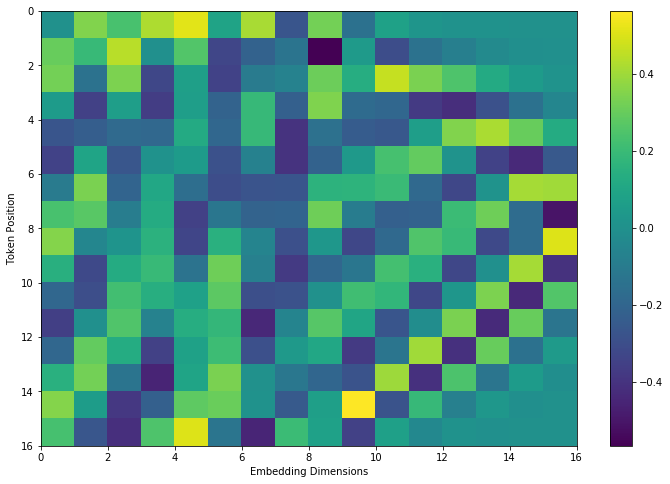

In [6]:
def GS(B):
    u = (B[0,:,0]/np.linalg.norm(B[0,:,0]))[:,np.newaxis]
    for i in range(1,B.shape[1]):
        bi = B[0,:,i][:,np.newaxis]
        ui = bi-np.matmul(np.matmul(np.matmul(u,np.linalg.inv(np.matmul(u.T,u))),u.T),bi)
        #print(ui)
        ui = ui/np.linalg.norm(ui)
        u = np.append(u,ui,axis=1)
    return u[np.newaxis, ...]

pe2 = GS(pe)


plt.figure(figsize=(12,8))
plt.pcolormesh(pe2[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dim))
plt.ylim((dim,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [7]:
for i in range(16):
    print(np.dot(pe2[0,:,i],pe2[0,:,i]))

0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999998


In [8]:
for i in range(16):
    for j in range(16):
        if i != j:
            print(np.dot(pe2[0,:,i],pe2[0,:,j]))

1.3877787807814457e-17
0.0
9.020562075079397e-17
0.0
6.938893903907228e-17
1.5265566588595902e-16
4.0245584642661925e-16
1.7208456881689926e-15
3.2751579226442118e-15
-1.858513343222512e-13
1.3856138458834266e-12
-2.0640988918074754e-11
-6.202482971673362e-12
1.6105204045380184e-09
-2.2447138595810268e-07
1.3877787807814457e-17
-4.85722573273506e-17
2.7755575615628914e-17
6.938893903907228e-17
1.5265566588595902e-16
-2.7755575615628914e-17
9.71445146547012e-17
8.326672684688674e-17
-1.2351231148954867e-15
1.2254086634300165e-13
-1.1009249067939209e-13
1.596450749374867e-11
1.8470322493691071e-10
-2.860467807064282e-09
1.2250868132446247e-08
0.0
-4.85722573273506e-17
2.7755575615628914e-17
9.71445146547012e-17
3.8163916471489756e-16
-4.0939474033052647e-16
2.7755575615628914e-16
-5.245803791353865e-15
-1.942890293094024e-15
1.5593082380860324e-13
8.490638747638002e-13
7.797637535666979e-12
4.902738909295934e-10
4.526789471048787e-09
3.9583734134929216e-07
9.020562075079397e-17
2.7755575